# Data Set Characteristics:

Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:

- [age] age in years
- [sex]
- [bmi] body mass index
- [bp] average blood pressure
- [s1] tc, total serum cholesterol
- [s2] ldl, low-density lipoproteins
- [s3] hdl, high-density lipoproteins
- [s4] tch, total cholesterol / HDL
- [s5] ltg, possibly log of serum triglycerides level
- [s6] glu, blood sugar level

INPUT DATA FRAME: (442, 11) Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')
NUMBER OF NULLS: AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64
categorical columns Index([], dtype='object')
numerical features Index(['AGE', 'SEX', 'S1', 'S6', 'Y'], dtype='object')


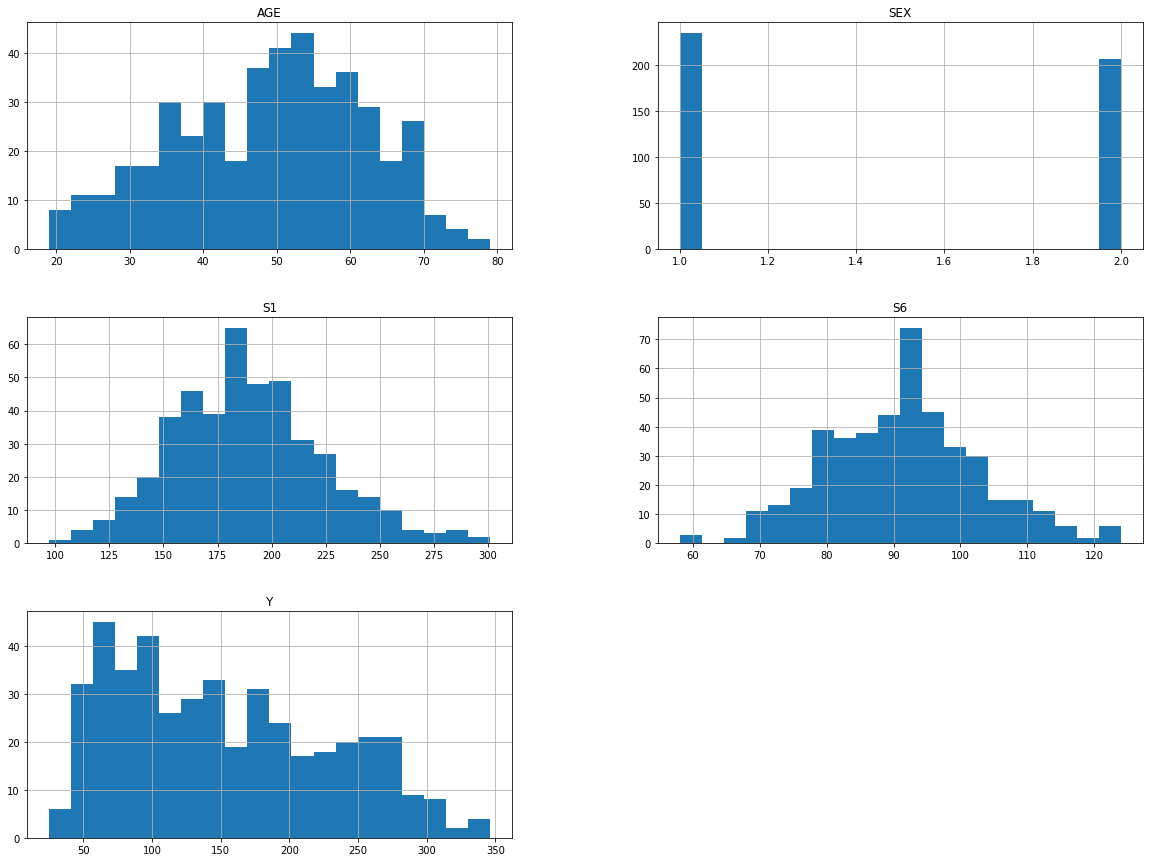

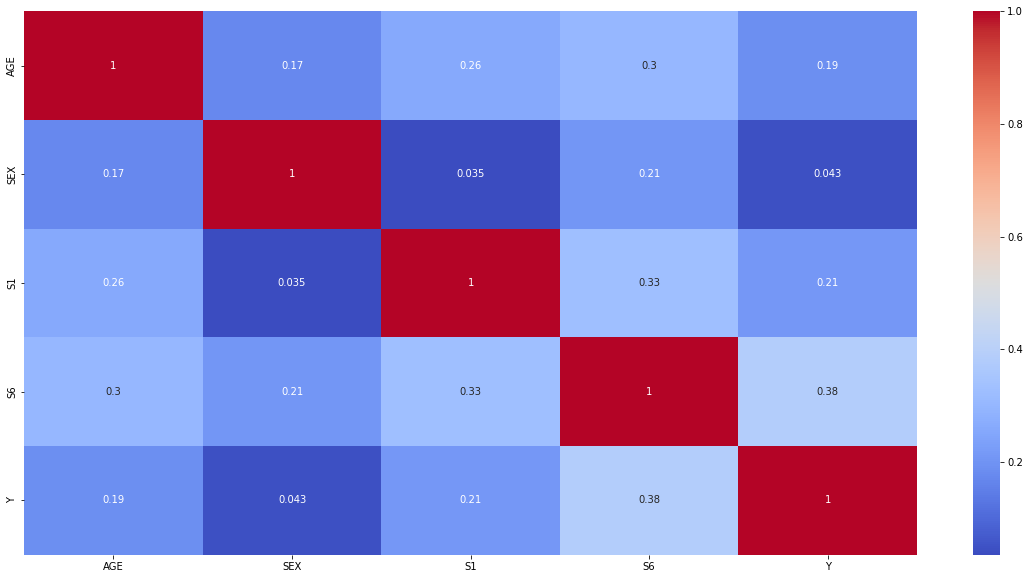

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


['BMI']
Coefficients: 
 [10.7627909]
Intercept: 
 -131.87377836094223
Mean squared error: 4061.83
Coefficient of determination: 0.23


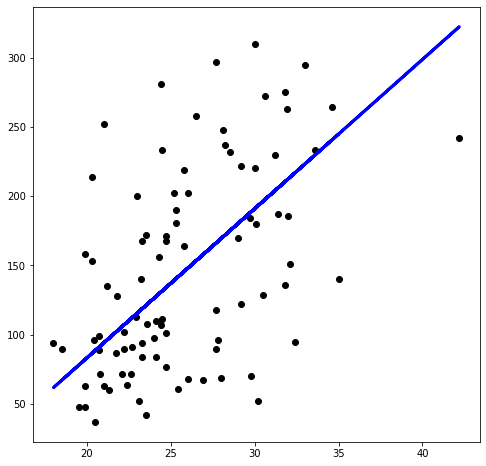

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



def exploratory (df):
    # Lendo o dataset
    print("INPUT DATA FRAME:", df.shape, df.columns)
    print("NUMBER OF NULLS:", df.isnull().sum())
    cat_feat = df.select_dtypes(include=['object']).columns
    print("categorical columns", cat_feat)   
    for cat in cat_feat:
        print("Feature:", cat, len (df[cat].unique())) 
    
    num_feat = df.select_dtypes(include=['int64']).columns
    print("numerical features",num_feat)
    
    df[num_feat].hist(bins=20, figsize=(20, 15))
    plt.show()
    
    
    for feature in cat_feat:
        plt.figure(figsize=(12,6))
        sns.countplot(x=feature, data=df)
        plt.xticks(rotation=90)
        plt.title(f"Distribution of {feature}")
        plt.show()
    
       # Sumário estatístico das variáveis numéricas

    corr = df[num_feat].corr()

    plt.figure(figsize=(20, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()
    
    display(df.describe())
    
    
def get_training_data (df):
    df = pd.read_csv("data/diabetes.csv")   
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    cols = list (df.columns)
    features = cols[2:3]
    print(features)
    label = cols[-1]
    X = df[features].copy().to_numpy()
    y = df[label].to_list()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    return X_train, y_train, X_test, y_test 


    

if __name__ == "__main__":
    

    df = pd.read_csv("data/diabetes.csv")   
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    exploratory(df)
    
    
    X_train, y_train, X_test, y_test = get_training_data(df)  
    
     # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print("Coefficients: \n", regr.coef_)
    print("Intercept: \n", regr.intercept_)
    
    rmse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    
    # The mean squared error
    print("Mean squared error: %.2f" % rmse_test)
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_test) 

    
    fig, axs = plt.subplots(1,1,figsize=(8,8))
    
    axs.scatter(X_test[:,0], y_test, color="black")
    axs.plot(X_test[:,0], y_pred, color="blue",linewidth=3)
    plt.show()